Part 1 Logistic Regression

1. Apply logistic regression. 

2. Use confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

Part 2 KNN

1.  Apply the KNN and predict your model

2. Choose the optimal number of neighbors

Part 3:  Decision tree and random forest

1. Apply decision tree and predict you model

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.

Now to finalize your project, make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant

# preprocessing

In [249]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [250]:
df = pd.read_csv("titanic-passengers.csv",sep=";")

In [251]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Cabin"].fillna("G6",inplace=True)
df["Embarked"].fillna("S",inplace=True)

In [254]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [255]:
df["Survived"] =df["Survived"].map({"Yes":1,"No":0})
df["Sex"] =df["Sex"].map({"male":1,"female":0})

In [256]:
df.corr()["Survived"].sort_values().to_frame()

,Survived
Sex,-0.543351
Pclass,-0.338481
Age,-0.069809
SibSp,-0.035322
PassengerId,-0.005007
Parch,0.081629
Fare,0.257307
Survived,1.000000


In [257]:
fig = px.imshow(df.corr()["Survived"].sort_values().to_frame(), text_auto=True,)
fig.show()

# Logistic Regression

In [258]:
x=df[["Sex","Pclass","Age","Parch","Fare"]]
y=df["Survived"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=20)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
lr=logreg.score(x_test,y_test)
lr

0.8324022346368715

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

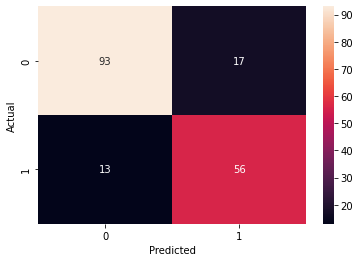

In [259]:
import seaborn as sns
confusion_matrix=pd.crosstab(y_test,y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [260]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
pred_prob=clf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:, 1])

0.8806982872200263

C:\Users\djebb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



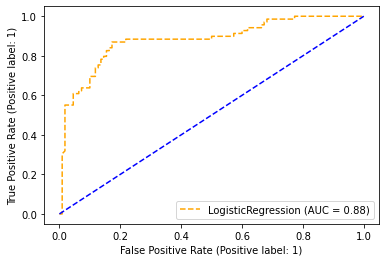

In [261]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Visualisation de la courbe ROC
metrics.plot_roc_curve(clf, x_test, y_test, linestyle='--', color='orange')
#Courbe ROC pour fpr=tpr
random_probs = [0 for i in range(len(y_test))] #Génère des 0 y_test fois
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.show()

# KNN

In [262]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=40)
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("accuracy=",accuracy_score(y_pred,y_test))

accuracy= 0.7563025210084033


In [263]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.71
Accuracy for k= 2 is: 0.71
Accuracy for k= 3 is: 0.72
Accuracy for k= 4 is: 0.73
Accuracy for k= 5 is: 0.73
Accuracy for k= 6 is: 0.74
Accuracy for k= 7 is: 0.73
Accuracy for k= 8 is: 0.73
Accuracy for k= 9 is: 0.73
Accuracy for k= 10 is: 0.73
Accuracy for k= 11 is: 0.73
Accuracy for k= 12 is: 0.74
Accuracy for k= 13 is: 0.74
Accuracy for k= 14 is: 0.75
Accuracy for k= 15 is: 0.76
Accuracy for k= 16 is: 0.74
Accuracy for k= 17 is: 0.73
Accuracy for k= 18 is: 0.72
Accuracy for k= 19 is: 0.73
Accuracy for k= 20 is: 0.72
Accuracy for k= 21 is: 0.72
Accuracy for k= 22 is: 0.7
Accuracy for k= 23 is: 0.73
Accuracy for k= 24 is: 0.73
Accuracy for k= 25 is: 0.73
Accuracy for k= 26 is: 0.72
Accuracy for k= 27 is: 0.71
Accuracy for k= 28 is: 0.68
Accuracy for k= 29 is: 0.66


In [264]:
kn=scores[21]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40,random_state=9)
tree1 = DecisionTreeClassifier()
tree1.fit(x_train,y_train)
y_pred=tree1.predict(x_test)
score1=accuracy_score(y_test,y_pred)
score1


0.7759103641456583

In [265]:
tree2 = DecisionTreeClassifier(criterion="entropy", splitter="random")
tree2.fit(x_train,y_train)
y_pred=tree2.predict(x_test)
score2=accuracy_score(y_test,y_pred)
score2

0.7535014005602241

In [266]:
dt=score2

In [267]:
clf=RandomForestClassifier(n_estimators=85)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
rf=metrics.accuracy_score(y_test, y_pred)
rf

0.803921568627451

score:0.7815126050420168
|--- feature_0 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_4 <= 28.86
|   |   |   |--- feature_4 <= 28.23
|   |   |   |   |--- feature_2 <= 37.00
|   |   |   |   |   |--- feature_2 <= 27.50
|   |   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 11.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  11.75
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 13.43
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  13.43
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 17.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  17.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   

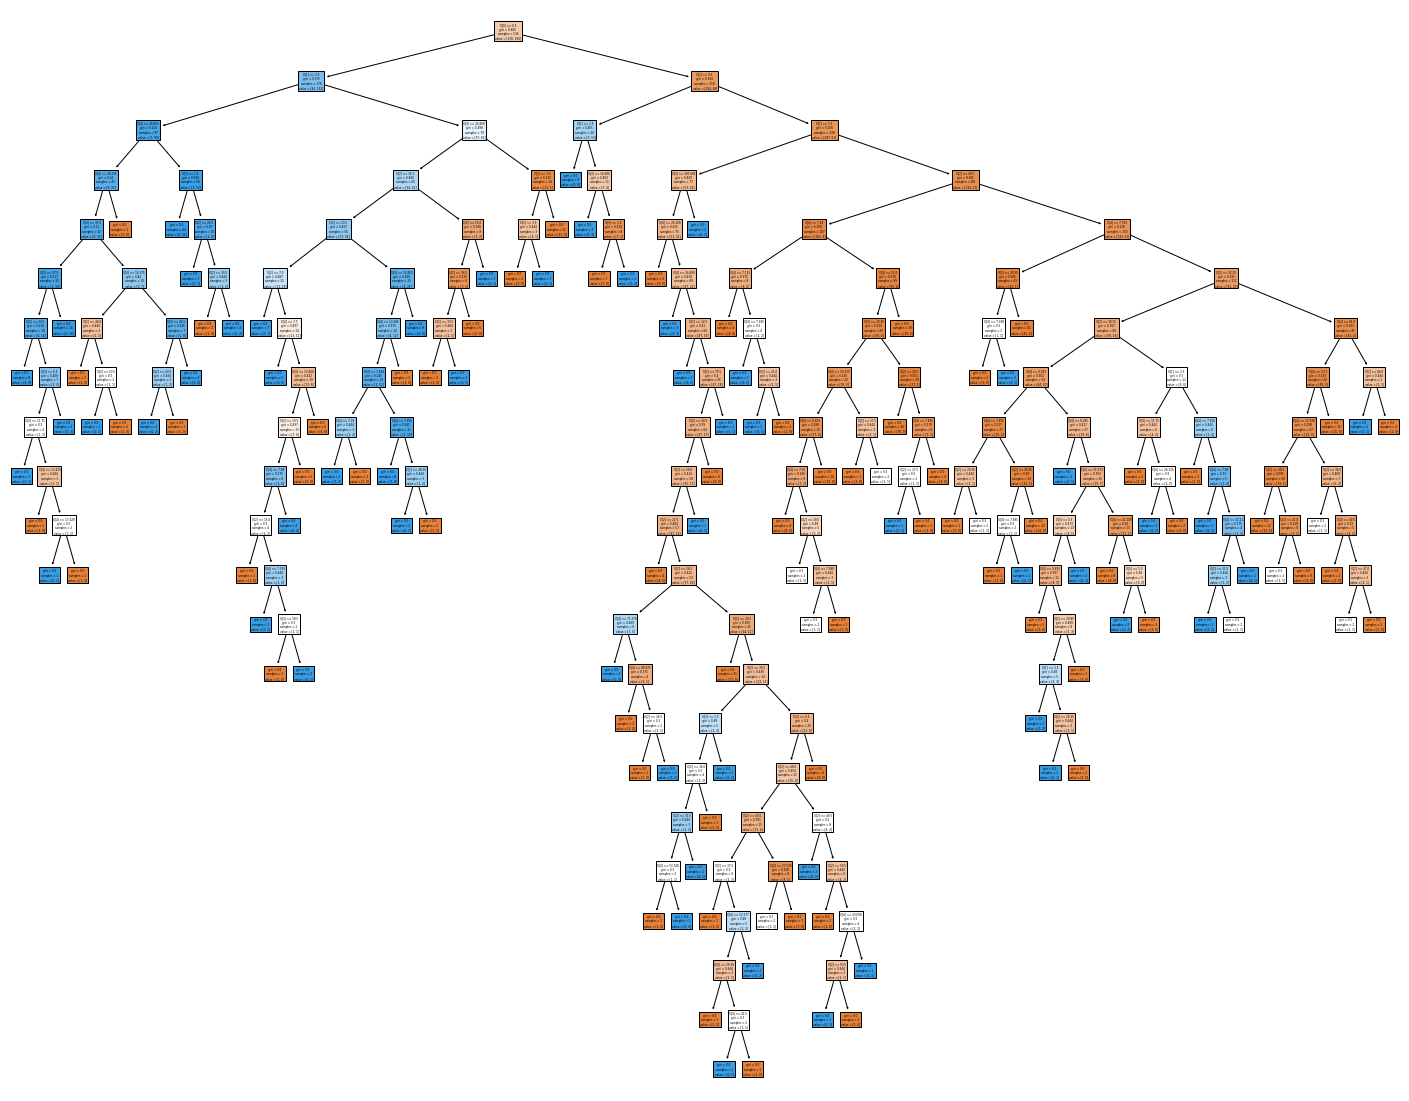

In [273]:
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

# Summary graph

Text(0, 0.5, 'Accuracy')

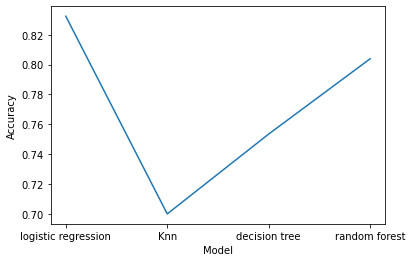

In [268]:
plt.plot(['logistic regression','Knn','decision tree', 'random forest'],[lr, kn, dt, rf])
plt.xlabel('Model')
plt.ylabel('Accuracy')